In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
# Load the dataset
df = pd.read_csv('cleaned_imagedataset.csv')

In [9]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb_normalized
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,0.008397
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,0.007634
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,0.009924
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,0.009924
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,0.001679


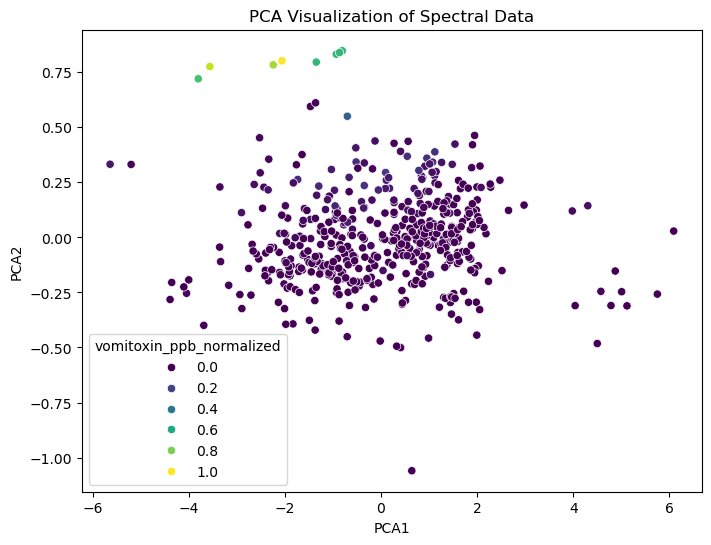

In [13]:
# Extract spectral data (assuming spectral columns are from index 1 to -1 excluding 'hsi_id' and 'vomitoxin_ppb')
spectral_data = df.iloc[:, 1:-1]

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectral_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='vomitoxin_ppb_normalized', palette='viridis', data=df)
plt.title('PCA Visualization of Spectral Data')
plt.show()

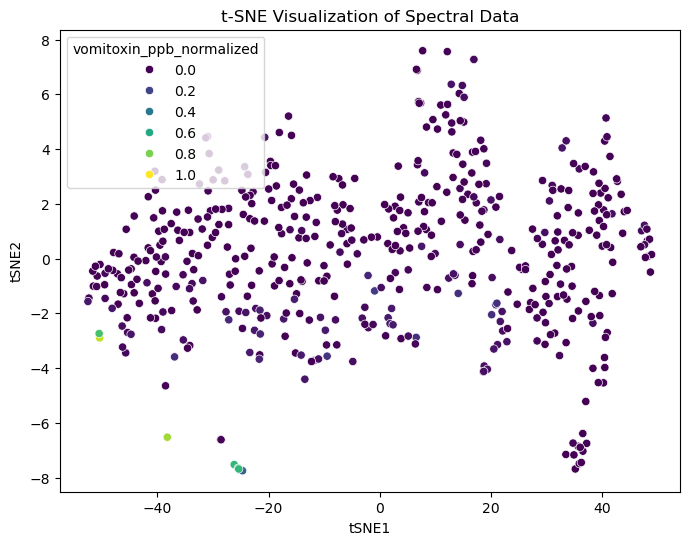

In [17]:
# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(spectral_data)
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='vomitoxin_ppb_normalized', palette='viridis', data=df)
plt.title('t-SNE Visualization of Spectral Data')
plt.show()


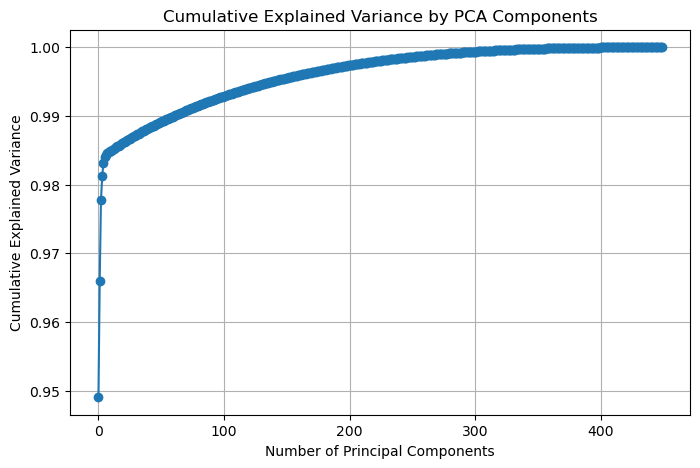

PCA Component 1: 94.90% Explained Variance
PCA Component 2: 1.70% Explained Variance
PCA Component 3: 1.17% Explained Variance
PCA Component 4: 0.36% Explained Variance
PCA Component 5: 0.19% Explained Variance


In [19]:
# PCA for dimensionality reduction
pca = PCA()
pca_result = pca.fit_transform(spectral_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Display top 5 components' explained variance
for i, var in enumerate(explained_variance[:5]):
    print(f"PCA Component {i+1}: {var:.2%} Explained Variance")


In [21]:
# PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_result = pca.fit_transform(spectral_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

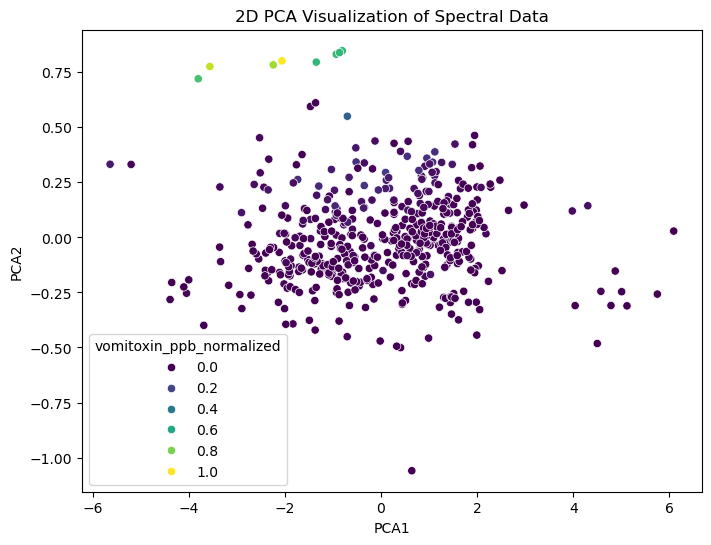

In [25]:
# 2D Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='vomitoxin_ppb_normalized', palette='viridis', data=df)
plt.title('2D PCA Visualization of Spectral Data')
plt.show()

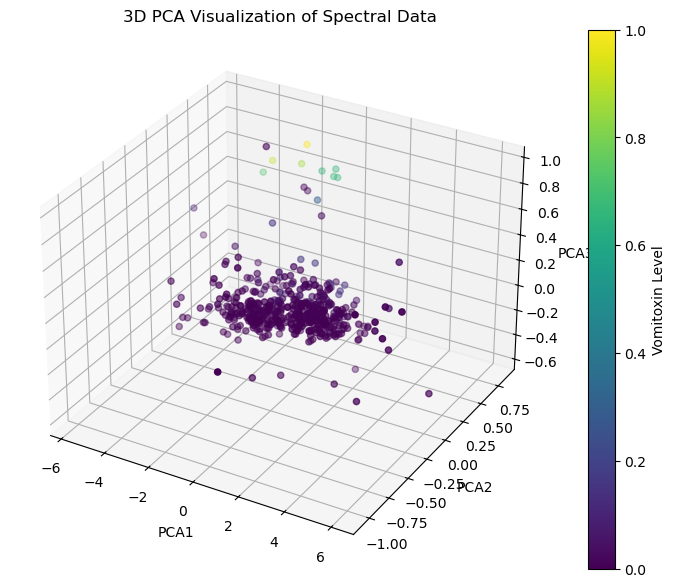

In [27]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['vomitoxin_ppb_normalized'], cmap='viridis')
ax.set_title('3D PCA Visualization of Spectral Data')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
fig.colorbar(scatter, ax=ax, label='Vomitoxin Level')
plt.show()


In [29]:
df.to_csv('level2_imagedataset.csv',index=False)